In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [15]:
# Load datasets
df = pd.read_csv('0_all.csv')
# df = pd.read_csv('4_5_all_standard_location.csv')
# df['Primary Contributing Factors'].unique()
df['Severity of Assault'].unique()

array(['Mild - Mild Soreness/Abrasions/Scratches/Small Bruises',
       'None - No Contact/Unwanted Contact w/No Injury',
       'Severe - Laceration/Fracture(s)/Head Injury',
       'None - No Contact or Unwanted Contact w/o Injury',
       'Moderate - Major Soreness/Cuts/Large Bruises', 'Severe', nan,
       'Mild', 'Moderate', 'Other'], dtype=object)

In [16]:
# Define the mapping from original values to simplified categories and numerical values
severity_mapping = {
    # Mild
    'Mild - Mild Soreness/Abrasions/Scratches/Small Bruises': 'Mild',
    'Mild': 'Mild',
    # Moderate
    'Moderate - Major Soreness/Cuts/Large Bruises': 'Moderate',
    'Moderate': 'Moderate',
    # Severe
    'Severe - Laceration/Fracture(s)/Head Injury': 'Severe',
    'Severe': 'Severe',
    # None
    'None - No Contact/Unwanted Contact w/No Injury': 'None',
    'None - No Contact or Unwanted Contact w/o Injury': 'None',
    # Other or missing
    'Other': 'Other',
    # Handle NaN or missing values (if any)
    pd.NA: 'Unknown',  # or 'Other' if you prefer
    None: 'Unknown',   # or 'Other'
}

# Numerical mapping (you can adjust the numbers as needed)
numerical_mapping = {
    'None': 0,
    'Mild': 1,
    'Moderate': 2,
    'Severe': 3,
    'Other': 4,
    'Unknown': np.nan
}

In [17]:
# Step 1: Create a cleaned 'Severity_Category' column
df['General Severity Category'] = df['Severity of Assault'].map(severity_mapping).fillna('Unknown')

# Step 2: Map to numerical values
df['General Severity Numerical'] = df['General Severity Category'].map(numerical_mapping)

# Verify the results
print("\nValue counts for Severity_Category:")
print(df['General Severity Category'].value_counts())

print("\nValue counts for Severity_Numerical:")
print(df['General Severity Numerical'].value_counts())


Value counts for Severity_Category:
General Severity Category
Unknown     946
None        217
Mild        147
Severe      124
Moderate     54
Other        29
Name: count, dtype: int64

Value counts for Severity_Numerical:
General Severity Numerical
0.0    217
1.0    147
3.0    124
2.0     54
4.0     29
Name: count, dtype: int64


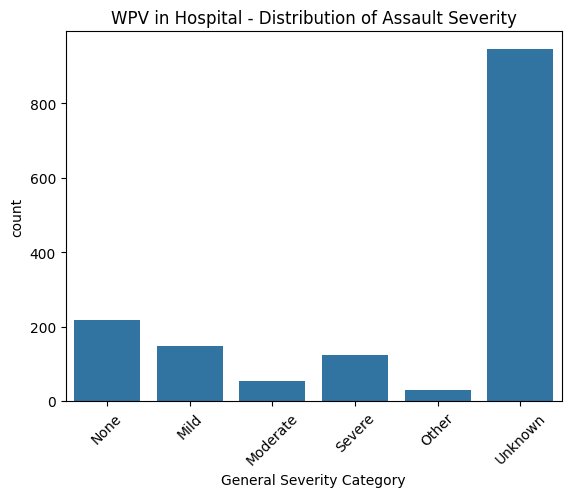

In [8]:
# Visualize the distribution
sns.countplot(data=df, x='General Severity Category', order=['None', 'Mild', 'Moderate', 'Severe', 'Other', 'Unknown'])
plt.title('WPV in Hospital - Distribution of Assault Severity')
plt.xticks(rotation=45)
plt.show()

In [13]:
df.head()

,Event Date,Facility Type,Department/Office Incident Took Place,Occupational Category of Person Affected,Aggressor,Type of Violence,Primary Contributing Factors,Severity of Assault,Primary Assault Description,Assault Description,Emotional and/ or Psychological Impact,Level of Care Needed,Response Action Taken,Split Roles,General Role,General Violence_Category,General Location,General Advanced Location,General Severity Category,General Severity Numerical
0,1/9/2024,ED,Nurses station,"Nurse (RN, LPN), Nurse (RN, LPN)",Patient,Physical,Homelessness/Lack of Housing,Mild - Mild Soreness/Abrasions/Scratches/Small...,"Verbal Assault, Pushing/Shoving, Harassment",Head-butted another patient,Mild - Upset/Angry/Scared/Humiliated,NaN,"Security Called, Law Enforcement Called, De-es...","Nurse (RN, LPN)",Nurse,Physical Violence,ED/ER,Clinical Unit,Mild,1.0
1,1/9/2024,ED,Nurses station,"Nurse (RN, LPN), Nurse (RN, LPN)",Patient,Verbal,Homelessness/Lack of Housing,Mild - Mild Soreness/Abrasions/Scratches/Small...,"Verbal Assault, Pushing/Shoving, Harassment",Head-butted another patient,Mild - Upset/Angry/Scared/Humiliated,NaN,"Security Called, Law Enforcement Called, De-es...","Nurse (RN, LPN)",Nurse,Verbal Abuse,ED/ER,Clinical Unit,Mild,1.0
2,1/9/2024,ED,Nurses station,"Nurse (RN, LPN), Nurse (RN, LPN)",Patient,Physical,Homelessness/Lack of Housing,Mild - Mild Soreness/Abrasions/Scratches/Small...,"Verbal Assault, Pushing/Shoving, Harassment",Head-butted another patient,Mild - Upset/Angry/Scared/Humiliated,NaN,"Security Called, Law Enforcement Called, De-es...","Nurse (RN, LPN)",Nurse,Physical Violence,ED/ER,Clinical Unit,Mild,1.0
3,1/9/2024,ED,Nurses station,"Nurse (RN, LPN), Nurse (RN, LPN)",Patient,Verbal,Homelessness/Lack of Housing,Mild - Mild Soreness/Abrasions/Scratches/Small...,"Verbal Assault, Pushing/Shoving, Harassment",Head-butted another patient,Mild - Upset/Angry/Scared/Humiliated,NaN,"Security Called, Law Enforcement Called, De-es...","Nurse (RN, LPN)",Nurse,Verbal Abuse,ED/ER,Clinical Unit,Mild,1.0
4,2/6/2024,ED,Patient room,"Nurse (RN, LPN), Security, Allied Health/Techn...",Patient,Physical,"Altered Mental Status, Inpatient Bed Unavailable",None - No Contact/Unwanted Contact w/No Injury,"Grabbing/Pinching/Scratching/Hair Pull, Kickin...",NaN,None - No emotional and/or Psychological Impact,NaN,"Security Called, Law Enforcement Called, Physi...","Nurse (RN, LPN)",Nurse,Physical Violence,ED/ER,Clinical Unit,None,0.0


In [14]:
df.to_csv('5_6_all_map_severe.csv', index=False)